In [2]:
import pandas as pd
import datasets



In [4]:
#################### All points stats ####################

all_points = pd.read_csv('../data/all_review_points.csv')
### group by venues and output statistics about the number of points, and number of reviews and average length of reviews and average length of
# group by venue
grouped = all_points.groupby('venue')
# number of points
num_points = grouped.size()
# number of reviews
num_reviews = grouped['focused_review'].nunique()
# average length of reviews
avg_length = grouped['focused_review'].apply(lambda x: x.str.split().apply(len).mean())
# average length of points
avg_length_points = grouped['point'].apply(lambda x: x.str.split().apply(len).mean())

# have a total row at the end
num_points['total'] = num_points.sum()
num_reviews['total'] = num_reviews.sum()
avg_length['total'] = avg_length.mean()
avg_length_points['total'] = avg_length_points.mean()

# output
stats = pd.concat([num_points, num_reviews, avg_length, avg_length_points], axis=1)
stats.columns = ['num_points', 'num_reviews', 'avg_length_review', 'avg_length_point']

print(stats)


            num_points  num_reviews  avg_length_review  avg_length_point
venue                                                                   
ACL_2017           542          140         474.280443         38.380074
ARR_2022          1701          404         320.339212         38.178131
EMNLP_2023        8616         3156         156.665390         39.142177
ICLR_2021          591          220         517.634518         41.605753
ICLR_2022         1447          544         392.876987         40.053905
ICLR_2023         2077          880         266.246509         38.531536
ICLR_2024        63280        18343         260.823072         41.739064
ICLR_2025       119311        33032         275.142627         42.563745
NIPS_2016          137           41         315.970803         39.321168
NIPS_2017          254           69         315.303150         38.866142
NIPS_2018          895          227         439.455866         40.148603
NIPS_2019          516          146         481.936

In [3]:
######################### Human Data #########################
import datasets
aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness', 'addressed_to_author','valid_point','professional_tone']
human_data = {}

for aspect in aspects:
    human_data[aspect] = []
    for type in ['gold', 'silver', 'hard']:
        try:
            df = datasets.load_dataset('boda/review_evaluation_human_annotation', split=type, name=aspect).to_pandas()
            human_data[aspect].append(df)
        except:
            continue
    ## concat all dataframes into one
    human_data[aspect] = pd.concat(human_data[aspect])


In [5]:
import datasets
import pandas as pd
human_data = datasets.load_dataset('boda/review_evaluation_human_annotation', name = 'combined_main_aspects', split = 'full').to_pandas()
grouped = human_data.groupby('venue')
# number of points
num_points = grouped.size()
# number of reviews
num_reviews = grouped['focused_review'].nunique()
# average length of reviews
avg_length = grouped['focused_review'].apply(lambda x: x.str.split().apply(len).mean())
# average length of points
avg_length_points = grouped['review_point'].apply(lambda x: x.str.split().apply(len).mean())

# have a total row at the end
num_points['total'] = num_points.sum()
num_reviews['total'] = num_reviews.sum()
avg_length['total'] = avg_length.mean()
avg_length_points['total'] = avg_length_points.mean()

# output
stats = pd.concat([num_points, num_reviews, avg_length, avg_length_points], axis=1)
stats.columns = ['num_points', 'num_reviews', 'avg_length_review', 'avg_length_point']

print(stats)


            num_points  num_reviews  avg_length_review  avg_length_point
venue                                                                   
ACL_2017            61           43         482.721311         42.278689
ARR_2022            89           77         334.505618         42.561798
EMNLP_2023         113          110         175.203540         39.477876
ICLR_2021           82           64         435.975610         44.170732
ICLR_2022           92           78         379.163043         42.097826
ICLR_2023           97           91         260.298969         41.567010
ICLR_2024          116          116         268.086207         49.258621
ICLR_2025          120          120         289.691667         42.375000
NIPS_2016           94           39         306.393617         41.425532
NIPS_2017           89           49         316.280899         43.808989
NIPS_2018           94           76         435.893617         42.180851
NIPS_2019           88           65         419.238

In [1]:
import pandas as pd 
import datasets

human_data  = datasets.load_dataset('boda/review_evaluation_human_annotation', name= 'combined_main_aspects', split = 'full')
aspects = [ 'helpfulness', 'verifiability', 'grounding_specificity','actionability']

human_data = human_data.to_pandas()


In [2]:
human_data.columns

Index(['review_point', 'paper_id', 'venue', 'focused_review', 'batch',
       'actionability', 'actionability_label', 'actionability_label_type',
       'id', 'grounding_specificity', 'grounding_specificity_label',
       'grounding_specificity_label_type', 'verifiability',
       'verifiability_label', 'verifiability_label_type', 'helpfulness',
       'helpfulness_label', 'helpfulness_label_type'],
      dtype='object')

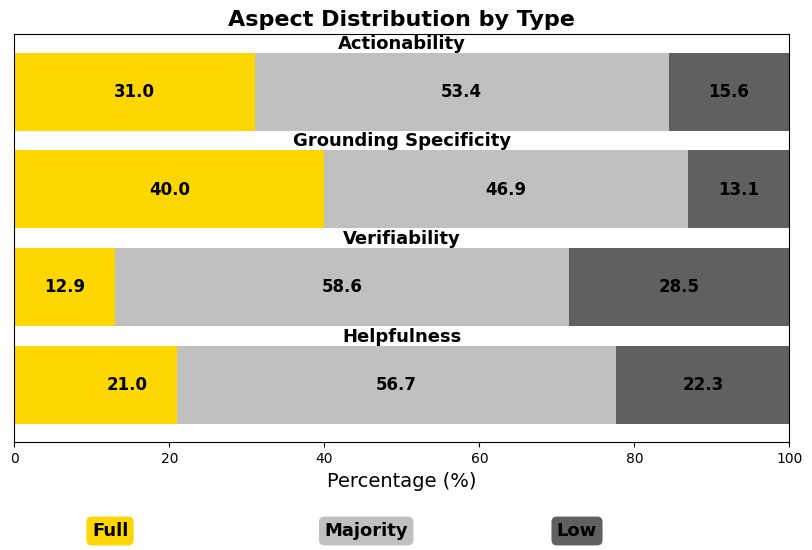

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def format_aspect_label(aspect):
    return aspect.replace('_', ' ').title()

# Data: Aspects and their percentages for each type
gold = []
silver = []
hard = []

for aspect in aspects:
    gold.append(len(human_data[human_data[f'{aspect}_label_type'] == 'gold']) / human_data.shape[0] * 100)
    silver.append(len(human_data[human_data[f'{aspect}_label_type'] == 'silver']) / human_data.shape[0] * 100)
    hard.append(len(human_data[human_data[f'{aspect}_label_type'] == 'hard']) / human_data.shape[0] * 100)

y_pos = np.arange(len(aspects))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.barh(y_pos, gold, color='#FFD700')
bar2 = ax.barh(y_pos, silver, left=gold, color='#C0C0C0')
bar3 = ax.barh(y_pos, hard, left=np.array(gold) + np.array(silver), color='#606060')

# Add percentage labels inside bars
def add_labels(bars, left_values, label_type):
    for i, (bar, left) in enumerate(zip(bars, left_values)):
        width = bar.get_width()
        if width > 5:
            x_shift = 4 if label_type == 'gold' and i == 0 else 0
            ax.text(left + width / 2 + x_shift, bar.get_y() + bar.get_height() / 2,
                    f'{width:.1f}', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

add_labels(bar1, np.zeros(len(gold)), label_type='gold')
add_labels(bar2, gold, label_type='silver')
add_labels(bar3, np.array(gold) + np.array(silver), label_type='hard')

# Add aspect names just above each bar in the center
total_bar_values = np.array(gold) + np.array(silver) + np.array(hard)
for i, aspect in enumerate(aspects):
    bar_center = total_bar_values[i] / 2
    bar_top = y_pos[i] + 0.4  # slightly above the bar (bar height is 0.8 by default)
    ax.text(bar_center, bar_top, format_aspect_label(aspect),
            ha='center', va='bottom', fontsize=13, fontweight='bold', color='black')

# Hide y-axis
ax.set_yticks([])
ax.set_xlabel("Percentage (%)", fontsize=14)
ax.set_title("Aspect Distribution by Type", fontsize=16, fontweight='bold')

# Remove default legend and add custom bottom legend row
if ax.legend_: ax.legend_.remove()

colors = ['#FFD700', '#C0C0C0', '#606060']
labels = ['Full', 'Majority', 'Low']
for i, (label, color) in enumerate(zip(labels, colors)):
    ax.text(i * 30 + 10, -1.5, label, ha='left', va='center', fontsize=13, fontweight='bold',
            bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'))

# Set x-limits
ax.set_xlim(0, min(100, max(total_bar_values) * 1.05))

# Layout
plt.subplots_adjust(bottom=0.2)
plt.savefig("outputs/human_data_aspect_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_3102696/2592711624.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn', len(labels))


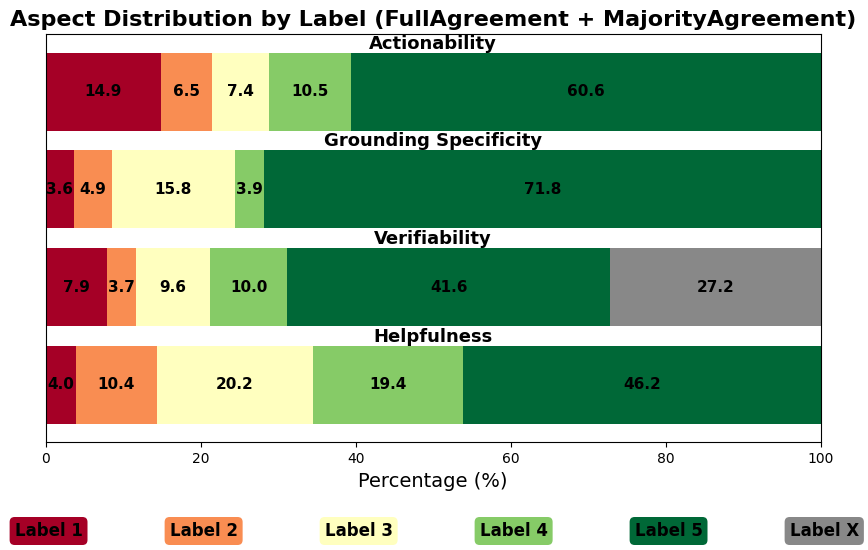

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define labels (1 to 5) and 'X' for verifiability
labels = [1, 2, 3, 4, 5]
verifiability_labels = [1, 2, 3, 4, 5, 'X']

# Create a red-to-green colormap (avoiding yellow)
cmap = cm.get_cmap('RdYlGn', len(labels))
colors = [cmap(i) for i in range(len(labels))]
colors.append('#888888')  # Changed 'X' label color to gray for better legibility

# Use the consistent paper order
aspects = [ 'helpfulness', 'verifiability', 'grounding_specificity','actionability']


def format_aspect_label(aspect):
    return aspect.replace('_', ' ').title()
def plot_aspect_distribution(label_type):
    label_percentages = {aspect: {} for aspect in aspects}

    for aspect in aspects:
        if ',' not in label_type:
            filtered_data = human_data[human_data[f'{aspect}_label_type'] == label_type]
        else:
            types = label_type.split(',')
            filtered_data = human_data[human_data[f'{aspect}_label_type'].isin(types)]
        total = filtered_data.shape[0]
        cur_labels = verifiability_labels if aspect == 'verifiability' else labels

        for label in cur_labels:
            count = len(filtered_data[filtered_data[f'{aspect}_label'] == str(label)])
            percentage = (count / total) * 100 if total > 0 else 0
            label_percentages[aspect][label] = percentage

    y_pos = np.arange(len(aspects))
    fig, ax = plt.subplots(figsize=(10, 6))
    left_values = np.zeros(len(aspects))
    total_bar_values = np.zeros(len(aspects))

    for i, label in enumerate(labels):
        label_values = [label_percentages[aspect].get(label, 0) for aspect in aspects]
        bar = ax.barh(y_pos, label_values, color=colors[i], left=left_values)
        total_bar_values += np.array(label_values)
        left_values += np.array(label_values)

        for rect, percent in zip(bar, label_values):
            if percent > 0:
                ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2,
                        f'{percent:.1f}', ha='center', va='center', fontsize=11, color='black', fontweight='bold')

    # Handle 'X' label for verifiability
    if 'verifiability' in aspects:
        idx = aspects.index('verifiability')
        x_percentage = label_percentages['verifiability'].get('X', 0)
        if x_percentage > 0:
            bar_x = ax.barh(y_pos[idx], x_percentage, color=colors[-1], left=left_values[idx])
            total_bar_values[idx] += x_percentage
            ax.text(left_values[idx] + x_percentage / 2, y_pos[idx],
                    f'{x_percentage:.1f}', ha='center', va='center', fontsize=11, color='black', fontweight='bold')
            left_values[idx] += x_percentage

    # Hide y-axis ticks
    ax.set_yticks([])

    # Add aspect names above each bar (centered)
    for i, aspect in enumerate(aspects):
        center = total_bar_values[i] / 2
        bar_top = y_pos[i] + 0.40  # slightly above the bar
        ax.text(center, bar_top, format_aspect_label(aspect),
                ha='center', va='bottom', fontsize=13, fontweight='bold', color='black')

    ax.set_xlabel("Percentage (%)", fontsize=14)
    if label_type.lower() == 'gold,silver':
        plot_title = "Aspect Distribution by Label (FullAgreement + MajorityAgreement)"
    else:
        plot_title = f"Aspect Distribution by Label ({label_type.capitalize()})"
    ax.set_title(plot_title, fontsize=16, fontweight='bold')

    # Remove default legend and create bottom legend row
    if ax.legend_: ax.legend_.remove()
    legend_labels = [f'Label {lbl}' for lbl in labels] + ['Label X']
    legend_x_start = (100 - len(legend_labels) * 18) / 2  # Center the legend row
    for i, (label, color) in enumerate(zip(legend_labels, colors)):
        ax.text(legend_x_start + i * 20, -1.5, label, ha='left', va='center', fontsize=12, fontweight='bold',
                bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'))

    # Tight x-axis
    ax.set_xlim(0, min(100, max(total_bar_values) * 1.05))

    # Space for legend row
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f"outputs/aspect_label_distribution_{label_type.replace(',', '_')}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Plot for both gold and silver
plot_aspect_distribution('gold,silver')


In [9]:
##########################333333 Synthetic data ############################
######################### Human Data #########################
import datasets
aspects = [ 'helpfulness', 'verifiability', 'grounding_specificity','actionability']

synthetic_data = {}

for aspect in aspects:
    synthetic_data[aspect] = []
    for type in ['train', 'test']:
        try:
            df = datasets.load_dataset('boda/review_evaluation_automatic_labels', split=type, name=aspect).to_pandas()
            synthetic_data[aspect].append(df)
        except:
            continue
    ## concat all dataframes into one
    synthetic_data[aspect] = pd.concat(synthetic_data[aspect])

In [11]:
grouped = synthetic_data['actionability'].groupby('venue')
# number of points
num_points = grouped.size()
# number of reviews
num_reviews = grouped['focused_review'].nunique()
# average length of reviews
avg_length = grouped['focused_review'].apply(lambda x: x.dropna().str.split().apply(len).mean())
avg_length_points = grouped['review_point'].apply(lambda x: x.str.split().apply(len).mean())

# have a total row at the end
num_points['total'] = num_points.sum()
num_reviews['total'] = num_reviews.sum()
avg_length['total'] = avg_length.mean()
avg_length_points['total'] = avg_length_points.mean()

# output
stats = pd.concat([num_points, num_reviews, avg_length, avg_length_points], axis=1)
stats.columns = ['num_points', 'num_reviews', 'avg_length_review', 'avg_length_point']

print(stats)


            num_points  num_reviews  avg_length_review  avg_length_point
venue                                                                   
ACL_2017           296          104         471.453287         39.375000
ARR_2022           714          317         305.819328         40.736695
EMNLP_2023         897          785         152.272018         39.329989
ICLR_2021          285          139         498.826241         45.778947
ICLR_2022          659          334         350.191131         42.658574
ICLR_2023          688          450         217.222384         40.606105
ICLR_2024         1652         1580         249.964286         42.937651
ICLR_2025         2519         2415         254.554585         43.834061
NIPS_2017           66           42         291.318182         40.015152
NIPS_2018          561          198         437.460289         41.226381
NIPS_2019          257          116         456.599222         43.778210
NIPS_2020          825          693         225.570

/tmp/ipykernel_3102696/1090703916.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn', len(labels))


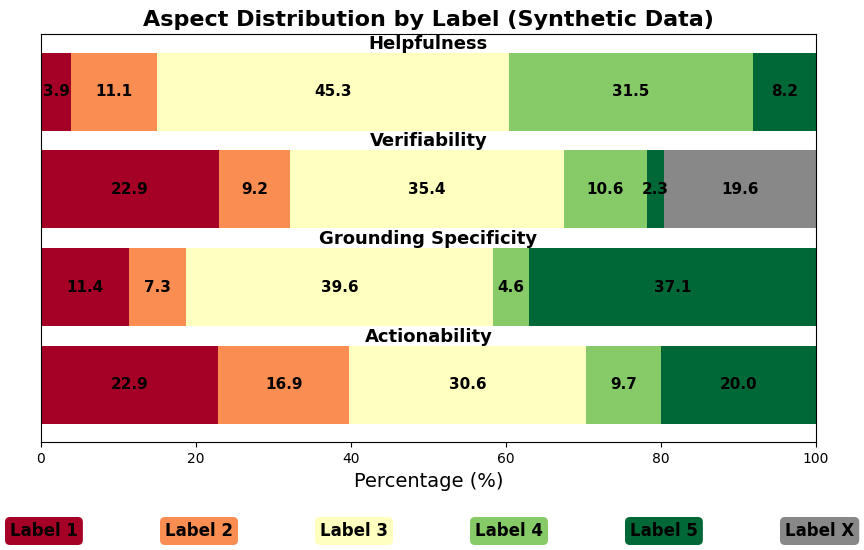

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define labels (1 to 5) and 'X' for verifiability
labels = [1, 2, 3, 4, 5]
verifiability_labels = [1, 2, 3, 4, 5, 'X']

# Create a red-to-green colormap (avoiding yellow)
cmap = cm.get_cmap('RdYlGn', len(labels))
colors = [cmap(i) for i in range(len(labels))]
colors.append('#888888')  # Changed 'X' label color to gray for better legibility

# Use the consistent paper order
aspects = ['actionability', 'grounding_specificity', 'verifiability', 'helpfulness']


# Store percentages for each aspect-label pair
label_percentages = {aspect: {} for aspect in aspects}

# Compute percentages for each aspect and label
for aspect in aspects:
    filtered_data = synthetic_data[aspect]
    total = filtered_data.shape[0]  # Total samples in the aspect
    filtered_data[f'chatgpt_{aspect}_score']= filtered_data[f'chatgpt_{aspect}_score'].astype(str)
    cur_labels = verifiability_labels if aspect == 'verifiability' else labels
    for label in cur_labels:
        count = len(filtered_data[filtered_data[f'chatgpt_{aspect}_score'] == str(label)])
        percentage = (count / total) * 100 if total > 0 else 0
        label_percentages[aspect][label] = percentage  

y_pos = np.arange(len(aspects))
fig, ax = plt.subplots(figsize=(10, 6))
left_values = np.zeros(len(aspects))
total_bar_values = np.zeros(len(aspects))

for i, label in enumerate(labels):
    label_values = [label_percentages[aspect].get(label, 0) for aspect in aspects]
    bar = ax.barh(y_pos, label_values, color=colors[i], left=left_values)
    total_bar_values += np.array(label_values)
    left_values += np.array(label_values)

    for rect, percent in zip(bar, label_values):
        if percent > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2,
                    f'{percent:.1f}', ha='center', va='center', fontsize=11, color='black', fontweight='bold')

# Handle 'X' label for verifiability
if 'verifiability' in aspects:
    idx = aspects.index('verifiability')
    x_percentage = label_percentages['verifiability'].get('X', 0)
    if x_percentage > 0:
        bar_x = ax.barh(y_pos[idx], x_percentage, color=colors[-1], left=left_values[idx])
        total_bar_values[idx] += x_percentage
        ax.text(left_values[idx] + x_percentage / 2, y_pos[idx],
                f'{x_percentage:.1f}', ha='center', va='center', fontsize=11, color='black', fontweight='bold')
        left_values[idx] += x_percentage

# Hide y-axis ticks
ax.set_yticks([])

# Add aspect names above each bar (centered)
for i, aspect in enumerate(aspects):
    center = total_bar_values[i] / 2
    bar_top = y_pos[i] + 0.40  # slightly above the bar
    ax.text(center, bar_top, format_aspect_label(aspect),
            ha='center', va='bottom', fontsize=13, fontweight='bold', color='black')

ax.set_xlabel("Percentage (%)", fontsize=14)


plot_title = f"Aspect Distribution by Label (Synthetic Data)"
ax.set_title(plot_title, fontsize=16, fontweight='bold')

# Remove default legend and create bottom legend row
if ax.legend_: ax.legend_.remove()
legend_labels = [f'Label {lbl}' for lbl in labels] + ['Label X']
legend_x_start = (100 - len(legend_labels) * 18) / 2  # Center the legend row
for i, (label, color) in enumerate(zip(legend_labels, colors)):
    ax.text(legend_x_start + i * 20, -1.5, label, ha='left', va='center', fontsize=12, fontweight='bold',
            bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'))

# Tight x-axis
ax.set_xlim(0, min(100, max(total_bar_values) * 1.05))

# Space for legend row
plt.subplots_adjust(bottom=0.2)

# Save and show
plt.savefig(f"outputs/synthetic_data_aspect_label_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

